Dataset Link - https://www.kaggle.com/snapcrack/all-the-news

In [1]:
import pandas as pd 

In [2]:
df_news = pd.read_csv('articles1.csv')
df_news.head(3)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."


In [3]:
df_news = df_news.drop(df_news.columns[0], axis= 1)
nRow, nCol = df_news.shape
print(f'There are {nRow} rows and {nCol} columns')

df_news.head()

There are 50000 rows and 9 columns


,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


## Decribe dataset

In [4]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   title        50000 non-null  object 
 2   publication  50000 non-null  object 
 3   author       43694 non-null  object 
 4   date         50000 non-null  object 
 5   year         50000 non-null  float64
 6   month        50000 non-null  float64
 7   url          0 non-null      float64
 8   content      50000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.4+ MB


In [5]:
df_news.isnull().sum()

id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

In [6]:
df_news.drop(columns = "url", axis = 1).head()


,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,"SEOUL, South Korea — North Korea’s leader, ..."


In [7]:
titles_df = df_news['title'].to_frame()

In [8]:
titles_df.sample(10, random_state = 1)

,title
26247,Sierra Club Discovers Founder Was a White Supr...
35067,Love letters to Paris from the stars of Roland...
34590,New acting FBI director contradicts White Hous...
16668,"Bumgarner, Gillaspie Lead Giants over Mets 3-0..."
12196,WaPo Admits Single-Payer Health Care Would be ...
2600,"Leaders Roll Up Sleeves on Climate, but Expert..."
9047,GWB Daughter Barbara Bush to Keynote Planned P...
2206,Student Loan Forgiveness Program Approval Lett...
25607,Dem Sen McCaskill: Trump Possibly ’Violated th...
11606,"Jerusalem Unity Day: Republicans, Democrats Jo..."


## Part of Speech Tagging

In [9]:
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
# Contraction Mapping
"""you're -> you are
i'm    -> I am
# uses \b boundaries for "unsafe"
ima    -> I am going to
yall  -> you all
gotta  -> got to"""
#!pip install contractions
import contractions


In [11]:
print(contractions.fix("i gotta finish this"))

i got to finish this


In [12]:
titles_df['title'] = titles_df['title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
titles_df.sample(10, random_state = 5)

,title
24166,"[Daniel, Defense, Cuts, Ties, with, Academy, S..."
42699,"[Clinton, campaign, corrals, media]"
15927,"[GOP, Rep., Says, Obama’s, Syrian, Refugee, ‘B..."
7473,"[Donald, Trump, Thrusts, Taiwan, Back, on, the..."
5070,"[Is, American, Baking, Really, Limited, to, Fr..."
33926,"[GOP, congressman, says, Spicer, ’needs, to, g..."
21409,"[Oklahoma, Newspaper, ’has not, Been, Forgiven..."
9495,"[Several, States, Sue, Trump, Over, New, Immig..."
16235,"[Russia, Warns, you.S., of, ’Terrible, Consequ..."
35747,"[Orlando, gunman, visited, club, on, night, of..."


In [13]:
titles_df['title'] = [' '.join(map(str, l))for l in titles_df['title']]
titles_df.sample(10, random_state = 5)

,title
24166,Daniel Defense Cuts Ties with Academy Sports F...
42699,Clinton campaign corrals media
15927,GOP Rep. Says Obama’s Syrian Refugee ‘Bait and...
7473,"Donald Trump Thrusts Taiwan Back on the Table,..."
5070,Is American Baking Really Limited to Fruitcake...
33926,GOP congressman says Spicer ’needs to go’ afte...
21409,Oklahoma Newspaper ’has not Been Forgiven’ Sin...
9495,Several States Sue Trump Over New Immigration ...
16235,Russia Warns you.S. of ’Terrible Consequences’...
35747,Orlando gunman visited club on night of attack...


In [14]:
# Noise Cleaning - spacing, special characters, lowercasing 
"""
    ^\w matches any word inside the blockquotes [a-zA-Z0-9]
    \d digits from 0 to 9
    \s matches any whitespace character (equal to [\r\n\t\f\v ])
    \' matches the character ' literally (case sensitive)
    '+' matches between one and unlimited times, as many times as possible, giving back as needed
"""
import regex as re
titles_df['title'] = titles_df['title'].str.lower()
titles_df['title'] = titles_df['title'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

titles_df.sample(10, random_state = 5)

,title
24166,daniel defense cuts ties with academy sports f...
42699,clinton campaign corrals media
15927,gop rep says obamas syrian refugee bait and sw...
7473,donald trump thrusts taiwan back on the table ...
5070,is american baking really limited to fruitcake...
33926,gop congressman says spicer needs to go after ...
21409,oklahoma newspaper has not been forgiven since...
9495,several states sue trump over new immigration ...
16235,russia warns yous of terrible consequences for...
35747,orlando gunman visited club on night of attack...


In [15]:
#nltk tokenization

titles_df['tokenized_title'] = titles_df['title'].apply(word_tokenize)
titles_df.sample(10, random_state = 5)

,title,tokenized_title
24166,daniel defense cuts ties with academy sports f...,"[daniel, defense, cuts, ties, with, academy, s..."
42699,clinton campaign corrals media,"[clinton, campaign, corrals, media]"
15927,gop rep says obamas syrian refugee bait and sw...,"[gop, rep, says, obamas, syrian, refugee, bait..."
7473,donald trump thrusts taiwan back on the table ...,"[donald, trump, thrusts, taiwan, back, on, the..."
5070,is american baking really limited to fruitcake...,"[is, american, baking, really, limited, to, fr..."
33926,gop congressman says spicer needs to go after ...,"[gop, congressman, says, spicer, needs, to, go..."
21409,oklahoma newspaper has not been forgiven since...,"[oklahoma, newspaper, has, not, been, forgiven..."
9495,several states sue trump over new immigration ...,"[several, states, sue, trump, over, new, immig..."
16235,russia warns yous of terrible consequences for...,"[russia, warns, yous, of, terrible, consequenc..."
35747,orlando gunman visited club on night of attack...,"[orlando, gunman, visited, club, on, night, of..."


In [16]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import matplotlib.pyplot as plt

color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(titles_df['title'])

# Explore more such analysis here - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools



/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:


# Now removing stopwords 

titles_df['tokenized_title'] = titles_df['tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
titles_df['tokenized_title_join'] = [' '.join(map(str, l)) for l in titles_df['tokenized_title']]

titles_df.sample(10, random_state = 5)



,title,tokenized_title,tokenized_title_join
24166,daniel defense cuts ties with academy sports f...,"[daniel, defense, cuts, ties, academy, sports,...",daniel defense cuts ties academy sports pullin...
42699,clinton campaign corrals media,"[clinton, campaign, corrals, media]",clinton campaign corrals media
15927,gop rep says obamas syrian refugee bait and sw...,"[gop, rep, says, obamas, syrian, refugee, bait...",gop rep says obamas syrian refugee bait switch...
7473,donald trump thrusts taiwan back on the table ...,"[donald, trump, thrusts, taiwan, back, table, ...",donald trump thrusts taiwan back table rattlin...
5070,is american baking really limited to fruitcake...,"[american, baking, really, limited, fruitcake,...",american baking really limited fruitcake ginge...
33926,gop congressman says spicer needs to go after ...,"[gop, congressman, says, spicer, needs, go, hi...",gop congressman says spicer needs go hitler co...
21409,oklahoma newspaper has not been forgiven since...,"[oklahoma, newspaper, forgiven, since, hillary...",oklahoma newspaper forgiven since hillary clin...
9495,several states sue trump over new immigration ...,"[several, states, sue, trump, new, immigration...",several states sue trump new immigration execu...
16235,russia warns yous of terrible consequences for...,"[russia, warns, yous, terrible, consequences, ...",russia warns yous terrible consequences attack...
35747,orlando gunman visited club on night of attack...,"[orlando, gunman, visited, club, night, attack...",orlando gunman visited club night attack left ...


In [19]:


# for sake of simplicity, showing 10 titles based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in titles_df['tokenized_title'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)



[('daniel', 'NN'), ('defense', 'NN'), ('cuts', 'NNS'), ('ties', 'NNS'), ('academy', 'JJ'), ('sports', 'NNS'), ('pulling', 'VBG'), ('ar15', 'JJ'), ('shelves', 'NNS'), ('breitbart', 'VBP')]
[('clinton', 'NN'), ('campaign', 'NN'), ('corrals', 'NNS'), ('media', 'NNS')]
[('gop', 'NNS'), ('rep', 'VBP'), ('says', 'VBZ'), ('obamas', 'JJ'), ('syrian', 'JJ'), ('refugee', 'NN'), ('bait', 'NN'), ('switch', 'NN'), ('endangers', 'NNS'), ('americans', 'NNS'), ('breitbart', 'VBP')]
[('donald', 'JJ'), ('trump', 'NN'), ('thrusts', 'NNS'), ('taiwan', 'VBP'), ('back', 'RB'), ('table', 'JJ'), ('rattling', 'VBG'), ('region', 'NN'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
[('american', 'JJ'), ('baking', 'NN'), ('really', 'RB'), ('limited', 'JJ'), ('fruitcake', 'NN'), ('gingerbread', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
[('gop', 'NNS'), ('congressman', 'NN'), ('says', 'VBZ'), ('spicer', 'NN'), ('needs', 'NNS'), ('go', 'VBP'), ('hitler', 'NN'), ('comments', 'NNS')]
[('oklahoma', 'JJ

In [20]:


# Yellow Brick is a POS visualizer - https://github.com/DistrictDataLabs/yellowbrick/blob/master/docs/api/text/postag.rst
# You may need to reload the workbook to activate it. In that case, re-run all cells again from the beginning 

!pip install -U yellowbrick



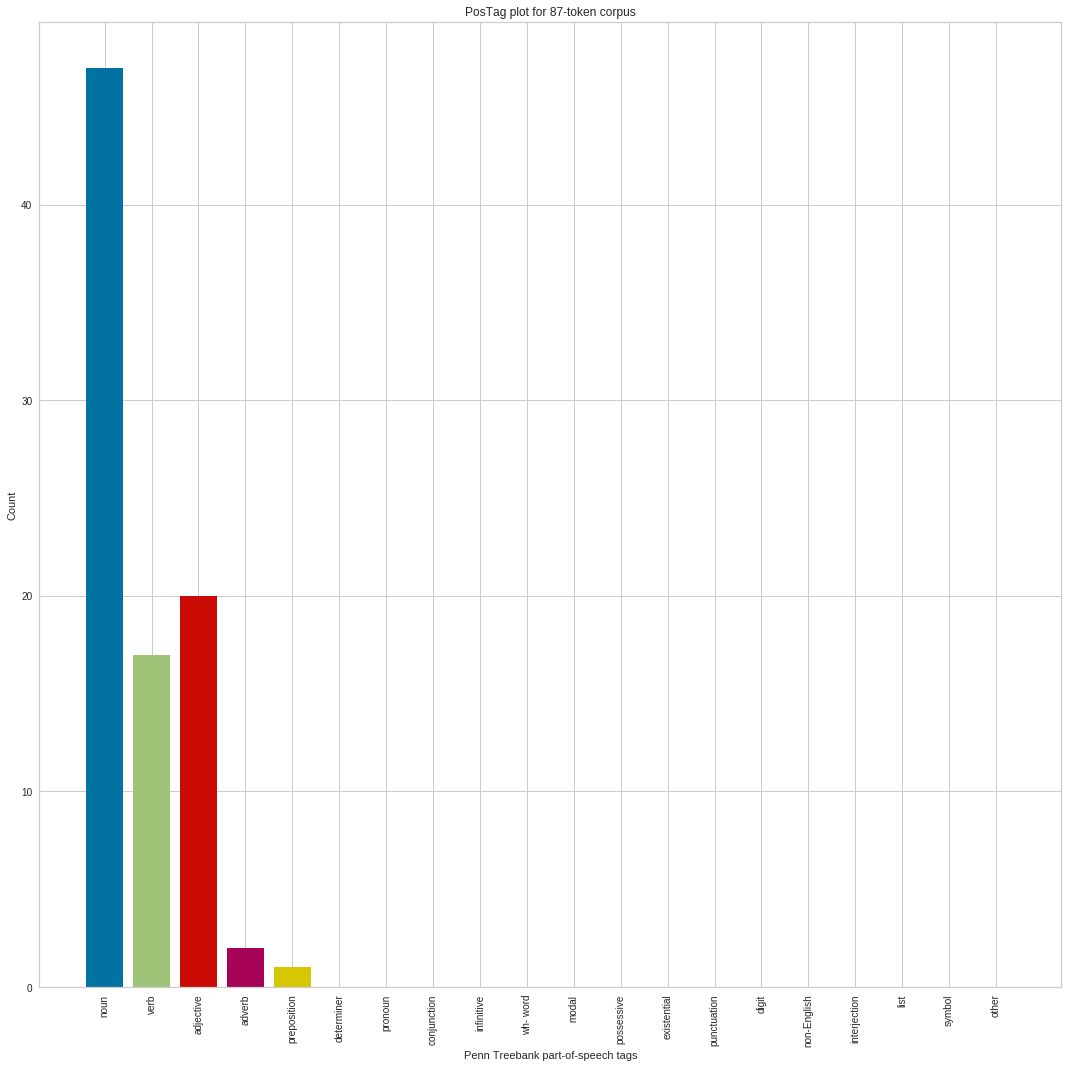

In [21]:


# Create the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()



## Shallow Parsing or Chunking

In [22]:
import nltk 

for sentence in tagged_stanzas:
  print(sentence)
  pattern = "NP: {<DT>?<JJ>*<NN>}"
  NPChunker = nltk.RegexpParser(pattern) 
  result = NPChunker.parse(sentence)
  result.pprint()
  print()

[('daniel', 'NN'), ('defense', 'NN'), ('cuts', 'NNS'), ('ties', 'NNS'), ('academy', 'JJ'), ('sports', 'NNS'), ('pulling', 'VBG'), ('ar15', 'JJ'), ('shelves', 'NNS'), ('breitbart', 'VBP')]
(S
  (NP daniel/NN)
  (NP defense/NN)
  cuts/NNS
  ties/NNS
  academy/JJ
  sports/NNS
  pulling/VBG
  ar15/JJ
  shelves/NNS
  breitbart/VBP)

[('clinton', 'NN'), ('campaign', 'NN'), ('corrals', 'NNS'), ('media', 'NNS')]
(S (NP clinton/NN) (NP campaign/NN) corrals/NNS media/NNS)

[('gop', 'NNS'), ('rep', 'VBP'), ('says', 'VBZ'), ('obamas', 'JJ'), ('syrian', 'JJ'), ('refugee', 'NN'), ('bait', 'NN'), ('switch', 'NN'), ('endangers', 'NNS'), ('americans', 'NNS'), ('breitbart', 'VBP')]
(S
  gop/NNS
  rep/VBP
  says/VBZ
  (NP obamas/JJ syrian/JJ refugee/NN)
  (NP bait/NN)
  (NP switch/NN)
  endangers/NNS
  americans/NNS
  breitbart/VBP)

[('donald', 'JJ'), ('trump', 'NN'), ('thrusts', 'NNS'), ('taiwan', 'VBP'), ('back', 'RB'), ('table', 'JJ'), ('rattling', 'VBG'), ('region', 'NN'), ('new', 'JJ'), ('york', 'N

In case of chunking, we see that the tokenized indivual word "daniel", "defense" has not been chunked together as NP = Noun Phrase

## Now we will explore some SpaCy functionalities

In [23]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [24]:
import spacy
# python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
nlp

### Dependency Parsing

In [25]:
from spacy import displacy

for sentence in titles_df['title'].sample(5, random_state = 5):
  sentence_doc = nlp(sentence)
  
  displacy.render(sentence_doc, style='dep', jupyter=True)
  print("Sentence is: ", sentence_doc)

Sentence is:  daniel defense cuts ties with academy sports for pulling ar15 from shelves  breitbart


Sentence is:  clinton campaign corrals media


Sentence is:  gop rep says obamas syrian refugee bait and switch endangers americans  breitbart


Sentence is:  donald trump thrusts taiwan back on the table rattling a region  the new york times


Sentence is:  is american baking really limited to fruitcake and gingerbread  the new york times


In [26]:
# Extract Noun Phrases

for sentence in titles_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  daniel defense cuts ties with academy sports for pulling ar15 from shelves  breitbart
Chunked noun phrases found:  daniel defense cuts ties
Chunked noun phrases found:  academy sports
Chunked noun phrases found:  ar15
Chunked noun phrases found:  shelves
Chunked noun phrases found:  breitbart

Sentence is:  clinton campaign corrals media
Chunked noun phrases found:  clinton campaign corrals media

Sentence is:  gop rep says obamas syrian refugee bait and switch endangers americans  breitbart
Chunked noun phrases found:  gop rep
Chunked noun phrases found:  endangers americans
Chunked noun phrases found:  breitbart

Sentence is:  donald trump thrusts taiwan back on the table rattling a region  the new york times
Chunked noun phrases found:  donald trump thrusts
Chunked noun phrases found:  the table
Chunked noun phrases found:  a region

Sentence is:  is american baking really limited to fruitcake and gingerbread  the new york times
Chunked noun phrases found:  american ba

In [27]:
# Extract Verb Phrases
! pip install textacy

Usually, though, we want to work with text that’s been processed by spaCy: tokenized, part-of-speech tagged, parsed,and so on.  Since spaCy’s pipelines are language-dependent, we have to load a particular pipeline to match the text;when working with texts from multiple languages, this can be a pain. Fortunately, textacy includes automatic languagedetection to apply the right pipeline to the text, and it caches the loaded language data to minimize wait time and hassle.

In [28]:
import textacy
# import warnings
# warnings.filterwarnings("ignore")

pattern = r'(<VERB>?<ADV>*<VERB>+)'

for sentence in titles_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)

  sentence_doc = textacy.make_spacy_doc(sentence, lang='en_core_web_sm')
  verb_phrases = textacy.extract.pos_regex_matches(sentence_doc, pattern)

  # Print all Verb Phrase
  for chunk in verb_phrases:
    print("Verb Phrase found: ",chunk.text)
  print()

Sentence is:  daniel defense cuts ties with academy sports for pulling ar15 from shelves  breitbart
Verb Phrase found:  cuts
Verb Phrase found:  pulling

Sentence is:  clinton campaign corrals media

Sentence is:  gop rep says obamas syrian refugee bait and switch endangers americans  breitbart
Verb Phrase found:  says
Verb Phrase found:  bait
Verb Phrase found:  switch

Sentence is:  donald trump thrusts taiwan back on the table rattling a region  the new york times
Verb Phrase found:  rattling

Sentence is:  is american baking really limited to fruitcake and gingerbread  the new york times
Verb Phrase found:  fruitcake
Verb Phrase found:  gingerbread



/opt/anaconda3/lib/python3.7/site-packages/textacy/extract.py:338: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
/opt/anaconda3/lib/python3.7/site-packages/textacy/extract.py:338: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
/opt/anaconda3/lib/python3.7/site-packages/textacy/extract.py:338: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
/opt/anaconda3/lib/python3.7/site-packages/textacy/extract.py:338: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
/opt/ana

## Named Entity Recognition (NER) with SpaCy

In [29]:
for sentence in titles_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  daniel defense cuts ties with academy sports for pulling ar15 from shelves  breitbart



Sentence is:  clinton campaign corrals media



Sentence is:  gop rep says obamas syrian refugee bait and switch endangers americans  breitbart



Sentence is:  donald trump thrusts taiwan back on the table rattling a region  the new york times



Sentence is:  is american baking really limited to fruitcake and gingerbread  the new york times


In [30]:


# now let's take a look at one whole piece of news to get a better context of NER extractions

for sentence in df_news['content'].sample(1, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)



Sentence is:  On June 16, renowned   designer and manufacturer Daniel Defense sent Breitbart News a press release in which they announced an end to their business relationship with Academy Sports. [The move stems fromAcademy’s   decision to pull   rifles —  or Modern Sporting Rifles (MSRs) —  from its shelves. Alleged Orlando attacker Omar Mateen used a legally purchased MSR, and Academy reacted by pulling anything that resembles an MSR, including   lighters. At the same time, they contend they will continue selling MSRs, but will simply refuse to advertise them in any way.  Daniel Defense doesn’t like it and they want Academy to know it. According to the press release, Daniel Defense Vice President of Sales Bill Robinson wrote: As you know we take our partnership with our stocking retailers very seriously.  We are committed to serving and supplying them at the highest level and expect our retailers to have that same level of commitment to our brand and our industry. Unfortunately, Aca

In [31]:
#!pip install tqdm
from tqdm import tqdm, tqdm_notebook

nlp = spacy.load('en_core_web_sm',
                 disable=['parser', 
                          'tagger',
                          'textcat'])

In [32]:
frames = []
for i in tqdm_notebook(range(1000)):
    doc = df_news.loc[i,'content']
    text_id = df_news.loc[i,'id']
    doc = nlp(doc)

    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [33]:
ner = pd.concat(frames)
ner.columns = ['Text','Start','Stop','NER_Type','id']
ner.tail()

,Text,Start,Stop,NER_Type,id
52,French,2974,2980,NORP,18417
53,Paris,3014,3019,GPE,18417
54,France,3024,3030,GPE,18417
55,France,3047,3053,GPE,18417
56,third,3064,3069,ORDINAL,18417


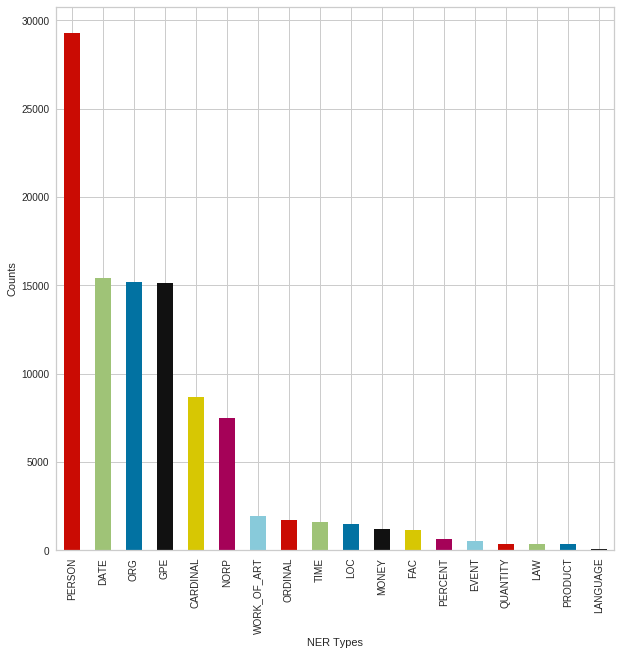

In [34]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color = color_list)

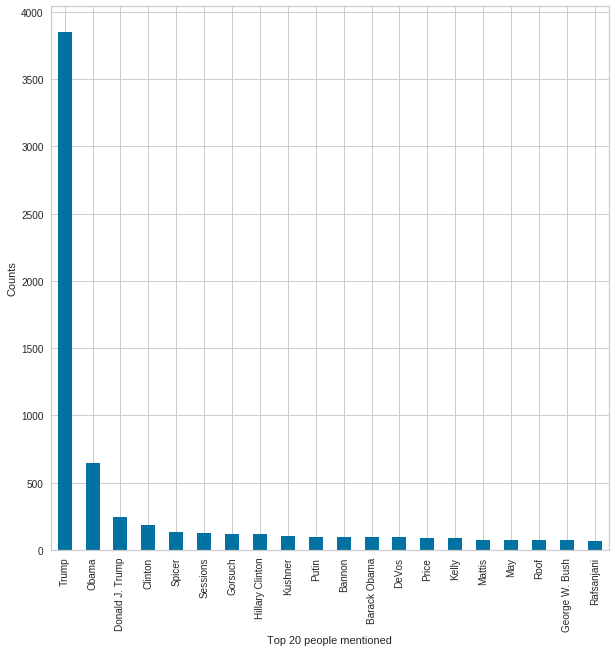

In [35]:
person = ner[ner.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')

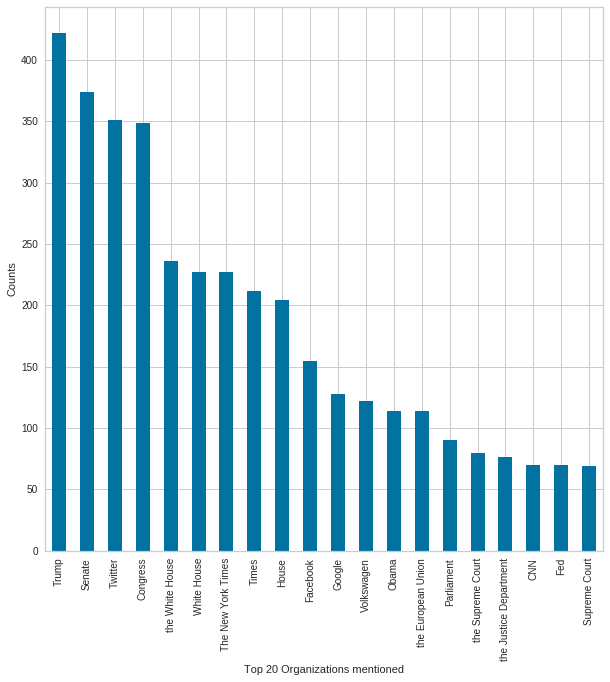

In [36]:
orgs = ner[ner.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Organizations mentioned")
plt.ylabel("Counts")

orgs.Text.value_counts()[:20].plot(kind='bar')

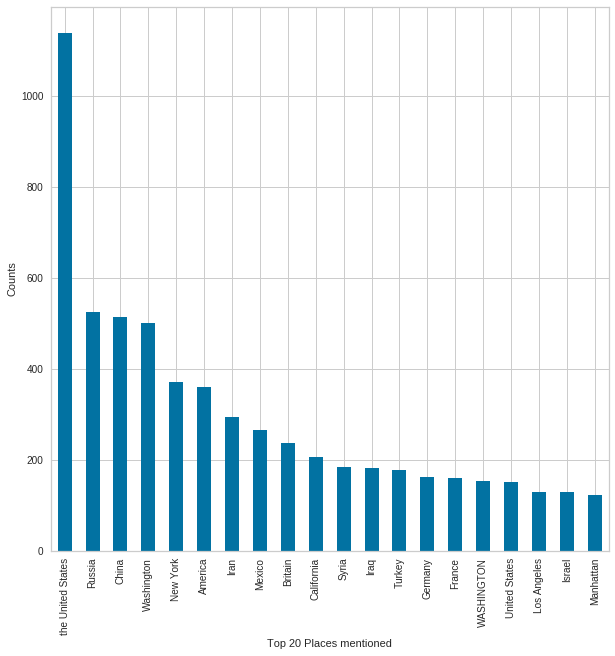

In [37]:
place = ner[ner.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place.Text.value_counts()[:20].plot(kind='bar')

# N-Grams 

In [38]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

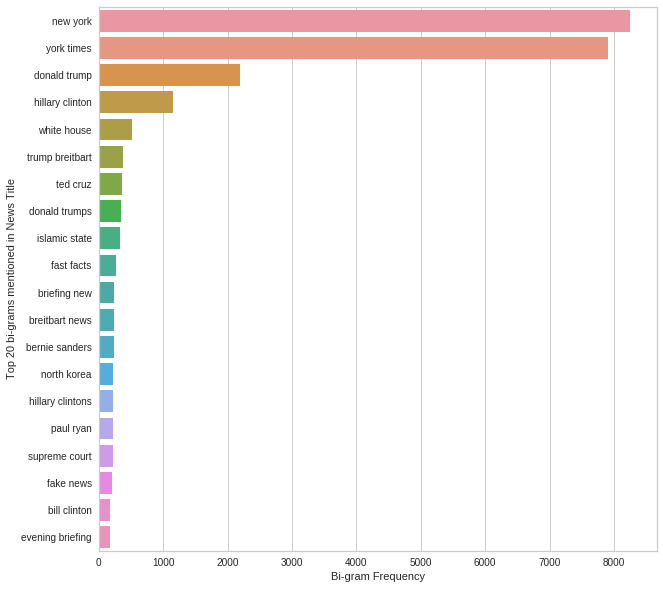

In [39]:
#Bi-grams 

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in News Title")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(titles_df['tokenized_title_join'],2)


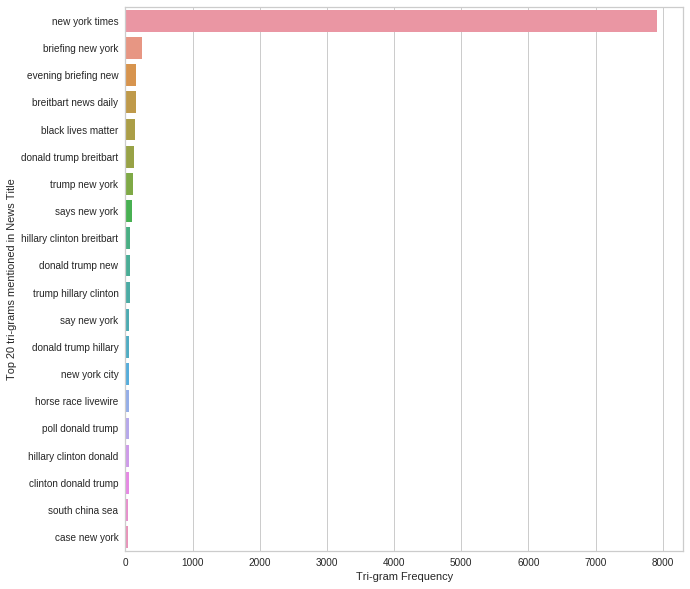

In [40]:
#Tri-grams 

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in News Title")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(titles_df['tokenized_title_join'])


## For next phase of analysis, we will consider only the "Content" column

In [41]:
# initializing a new dataframe with only the content column for faster operation 

content_df = df_news['content']
content_df = content_df.to_frame()
content_df
#content_df.sample(10, random_state = 5)


,content
0,WASHINGTON — Congressional Republicans have...
1,"After the bullet shells get counted, the blood..."
2,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,"Death may be the great equalizer, but it isn’t..."
4,"SEOUL, South Korea — North Korea’s leader, ..."
...,...
49995,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,I’ve spent nearly 20 years looking at intellig...
49997,Donald Trump will not be taking necessary st...
49998,Dozens of colleges could be forced to close ...


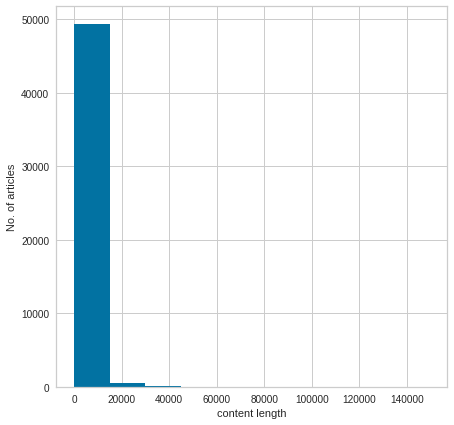

In [42]:
# visualizing content length
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.xlabel("content length")
plt.ylabel("No. of articles")

content_df['content'].str.len().hist()

## Parts of Speech (POS) Tagging


### Expand Contractions

In [43]:
# content_df['content'] = content_df['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])
# content_df.sample(10, random_state = 5)
# #content_df.head()

In [44]:
# #joining back the list of items into one string

# content_df['content'] = [' '.join(map(str, l)) for l in content_df['content']]
# content_df.sample(10, random_state = 5)

### Noise Cleaning

In [45]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
content_df['content'] = content_df['content'].str.lower()
content_df['content'] = content_df['content'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

content_df.sample(10, random_state = 5)

,content
24166,on june 16 renowned designer and manufacture...
42699,gorham new hampshire cnn hillary clintons camp...
15927,rep ryan zinke says the obama administration...
7473,washington over the past two decades taiwa...
5070,american baking is a jumble of pies babkas a...
33926,aurora colorado cnn white house press secretar...
21409,a newspaper in the typically red state of okla...
9495,four states are currently suing president do...
16235,beirut russia warned the united states sat...
35747,cnn the orlando gunman went to the pulse nigh...


In [ ]:
#nltk tokenization

content_df['tokenized_content'] = content_df['content'].apply(word_tokenize)
content_df.sample(10, random_state = 5)

In [ ]:
# Before removing checking occurances of stopwords in article content


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)
plot_top_stopwords_barchart(content_df['content'])

In [ ]:
# Now we remove stopwords 

content_df['tokenized_content'] = content_df['tokenized_content'].apply(lambda x: [word for word in x if word not in stop_words])
content_df['tokenized_content_join'] = [' '.join(map(str, l)) for l in content_df['tokenized_content']]

content_df.sample(10, random_state = 5)

In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(content_df['content'])

In [ ]:
# for sake of simplicity, showing 10 article contents based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in content_df['tokenized_content'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

In [ ]:
print(X_bow_subset.shape)
print(X_bow_subset.toarray())

In [ ]:
vectorizer_bow_subset_2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_bow_subset_2 = vectorizer_bow_subset_2.fit_transform(corpus_bow_subset)

In [ ]:
print(vectorizer_bow_subset_2.get_feature_names())
print(X_bow_subset_2.toarray())